Supervised learning : Label이 있는 data

데이터를 받아서 함수를 찾고 나서(Machine learning)

1. Regression(회귀) - y값을 실수로 예측하는 것  

저번주 내용(Boston House price)
2. Classification(분류) - y값을 0, -1, 1같이 양자화된 값으로 받아들이는 것  
\
Iris classification\
분꽃의 종류 3가지  

1) 길이 ₩₩ , 넓이 == , ....   

2) 길이 ₩- , 넓이 =₩ , ....    

3) 길이 ₩= , 넓이 =- , .... 

여러가지 특성을 기준으로 분꽃을 분류하는 것(Classification)

#####Classification

1. decision tree ** 다음주
2. Random forest - decision tree를 여러번 하는 과정임
3. regression based classification ***이번시간


## 1. logistic regression (Classification)

### Sigmold Function : $$ f(x) = \frac{1}{1+e^{-wx}} $$

만약 features가 2개라면 : $$ f(x) = \frac{1}{1+e^{-(w_1x_1+w_0)}} $$

if $$  wx factor -> \infty \\\\\\\\ then, f(x) -> 1 $$

if $$ if  wx factor -> -\infty \\\\\\\\ then, f(x) -> 0 $$


In [23]:
import numpy as np
import matplotlib.pyplot as plt

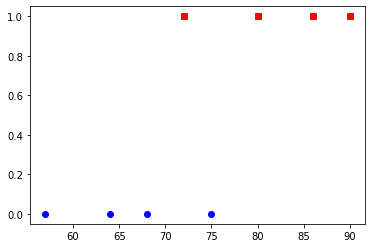

In [27]:
exam = [90,86,72,80,57,68,64,75]
grade = [1,1,1,1,0,0,0,0]
plt.plot(exam, [i if i ==1 else None for i in grade],'rs')
plt.plot(exam, [i if i ==0 else None for i in grade], 'bo')

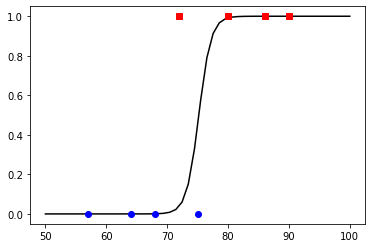

In [75]:
x = np.linspace(50,100,50)
def sig(x,w,w_0):
    return 1.0/(1+np.exp(-w*x-w_0))
plt.plot(x,sig(x,1,-75.2),'k-')
plt.plot(exam, [i if i ==1 else None for i in grade],'rs')
plt.plot(exam, [i if i ==0 else None for i in grade], 'bo')

Maximum Likelihood Estimation + Graient Descent Method


How to find the best fitted line?
Maximum Likelihood Estimation (MLE) + Gradient Descent Method (GD)
개별 데이터들이 독립적이라고 가정하면 최대 가능도(maximum likelihood)는 다음처럼 주어진다.$$ L(w)= \prod_{i} f_w(x_i)^{y_i} [1-f_w(x_i) ]^{1-y_i}, $$여기에서 $f$는 모델 예측값, $y$는 실제 레이블을 의미한다. 위의 식을 살펴보면 만약 $y_i=1$이면 $f_w$이고 $y_i=0$이면 $(1-f_w)$로 주어지는 값임을 알 수 있다. 따라서 다음의 식을 최대화하는 $w$를 찾으면 좋은 fitting을 구할 수 있다. 위의 식을 그대로 최대화해도 되지만 계산의 편의를 위해 $-\log$를 취해서 log likelihood를 최소화하는 과정을 통해 $w$를 찾아보자.

log likelihood 함수는 다음처럼 주어진다.$$
-\log L(w)= -\sum_i [ y_i \log f_w + (1-y) \log (1-f_w) ].$$이 식을 cross entropy (CE) 혹은 log loss function 이라고 부른다. 이 함수가 최소가 되려면 미분값이 $0$이 되는 조건을 만족하면 해야 한다.$$\begin{align}
-\frac{\partial \log L(w)}{\partial w} &amp;= -\frac{\partial }{\partial w}  y_i \log f_w + (1-y_i) \log (1-f_w)  \\
&amp;= -\frac{y_i }{f_w} \frac{\partial f_w}{\partial w} + \frac{1-y_i }{1-f_w} \frac{\partial f_w}{\partial w} \\
&amp;= -\frac{y_i }{f_w} f_w(1-f_w)x_i + \frac{1-y_i }{1-f_w} f_w(1-f_w)x_i \\
&amp;= -\frac{y_i }{f_w} f_w(1-f_w)x_i + \frac{1-y_i }{1-f_w} f_w(1-f_w)x_i \\
&amp;= (f_w - y_i)x_i =0. \end{align}$$

아쉽게도 $w$를 해석적으로 구할 수 있는 방법은 없지만 위의 결과와 경사하강법(Gradient Descent method)를 활용하면 손쉽게 최소값을 찾을 수 있다. 즉 다음의 식을 따라 오차(cross entropy)를 줄이는 방향으로 $w$의 값을 바꾸면서 오차가 최소값까지 도달할 때까지 위의 계산을 반복한다.$$\begin{align} w&amp;=w- \eta \frac{\partial }{\partial w}[-\log L(w)]\\
&amp;=w+\eta \sum_i (y_i - f_w )x_i \end{align}$$

#### Logistic regression 실습

In [84]:
from sklearn.linear_model import LogisticRegression
X = [[i] for i in exam]
y = grade

In [85]:
log_reg = LogisticRegression(solver= 'lbfgs')
log_reg.fit(X,y)

LogisticRegression()

In [57]:
log_reg.coef_, log_reg.intercept_

(array([[0.32895009]]), array([-24.25957919]))

In [58]:
log_reg.predict([[100]])

array([1])

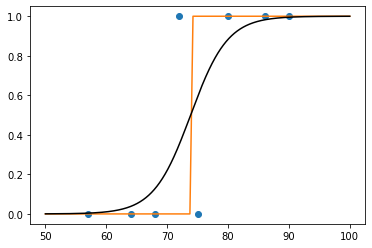

In [73]:
x = [[i] for i in np.linspace(50,100,100)]
x_0 = np.linspace(50,100,1000)
plt.plot(X,y,'o')
plt.plot(x,log_reg.predict(x))
plt.plot(x_0,sig(x_0,0.3285009,24.25957919),'k-')

고차원 데이터의 경우 잘 맞지 않을 수 있음. \
단순 증가, 감수의 경우에만 잘 맞아떨어짐. \
따라서, 항상 Underfitting의 가능성이 아주 높음

In [50]:
log_reg.score(X,y)

0.75

### 이러한 데이터는 Logistic Regression을 통해서 분석할 수 없다

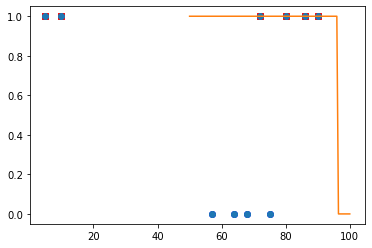

In [86]:
exam = [90,86,72,80,57,68,64,75,10,5]
grade = [1,1,1,1,0,0,0,0,1,1]
plt.plot(exam, [i if i ==1 else None for i in grade],'rs')
plt.plot(exam, [i if i ==0 else None for i in grade], 'bo')
x = [[i] for i in np.linspace(50,100,100)]
plt.plot(X,y,'o')
plt.plot(x,log_reg.predict(x))

In [87]:
log_reg.score(X,y)

0.6

### Softmax Regression (Multinomial Logistic Regression)

- 여러 개의 class를 가지는 분류 방법(나중에 다시 배울 것)
- 앞서 한 Regression은 0,1 두가지만 가능

## 2. Support Vector Machine(SVM)
매우 강력한 분류 기법, 핵심 개념도 쉬움

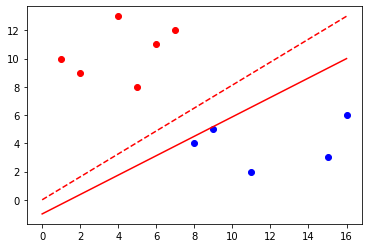

In [19]:
green = [[1,4,6,2,5,7],[10,13,11,9,8,12]]
blue = [[11,9,8,15,16],[2,5,4,3,6]]
plt.plot(green[0],green[1],'ro')
plt.plot(blue[0],blue[1],'bo')
plt.plot([0,16],[-1,10],'r-')
plt.plot([0,16],[0,13],'r--')

점선이 더 좋은 구분선같이 보임 - 왜? 점선이 실선보다 더 멀리 있어보임

각 집단에서 구분선까지 가장 가까운 점과 구분선사이의 거리를 Margin이라고 부른다. 이 마진을 최대화 하는 선을 찾는 것이 목표이다.


*** 하지만, 그렇게 단순하지만은 않음. 어떤 데이터는 다른 그룹 속에 속해있기도 함.. 따라서 답은 없음. 데이터가 많을 수록 더 좋은 결과(확률)을 얻을 뿐, 정해진 답이 없다.

####  SVM(SVC) 실습

In [116]:
from sklearn.svm import SVC # Support vector classification
X1 = np.concatenate((np.transpose(green),np.transpose(blue)))
y = [1,1,1,1,1,1,0,0,0,0,0]

In [117]:
svc = SVC(kernel = 'linear')
svc.fit(X1,y)
svc.decision_function(X1)

array([ 2.71399982,  2.71448661,  1.57167583,  2.14259443,  0.99994591,
        1.5718381 , -2.42848643, -0.99989182, -1.00005409, -3.28518886,
       -2.71345894])

In [122]:
svc.coef_, svc.intercept_

(array([[-0.28562156,  0.28578383]]), array([0.14178311]))

In [119]:
svc.predict([[2,10]])

array([1])

2,10은 1의값(녹색)을 가질 것이다. 이런 식으로, 원래 있던 데이터셋(X1,y)을 통해서 hyper plane(이번 경우에선 line)을 결정하고, 어떤 식으로 분류될 지 예측할 수 있다.

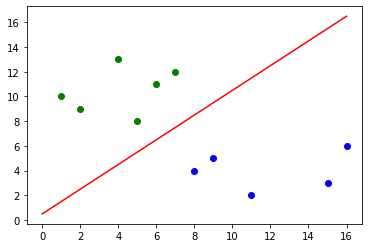

In [123]:
plt.plot(green[0],green[1],'go')
plt.plot(blue[0],blue[1],'bo')
x=np.linspace(0,16,20)
a=-svc.coef_[0,0]/svc.coef_[0,1]   #### 선형 기울기는 -coef[0,0]/coef[0,1]
b=svc.intercept_[0]/svc.coef_[0,1]    #### 선형 y절편은 intercept[0]/coef[0,1]
plt.plot(x,a*x+b,'r-')

### Nomlinear Support Vector Machine

직선을 쓰지 않거나, 곡선을 써야 데이터를 분류할 수 있을 경우

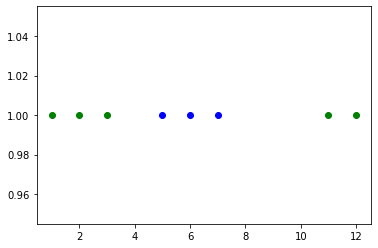

In [124]:
green = [1,2,3,11,12]
blue = [5,6,7]
plt.plot(blue, [1 for i in blue],'bo')
plt.plot(green, [1 for i in green],'go')

##### 이런 데이터셋의 경우 Linear SVM 불가능하다. 따라서 차원을 늘려줘서 Hyper plane을 형성해준다. 
현재 1차원의 데이터셋이 존재하므로, 2차원으로 늘려주면

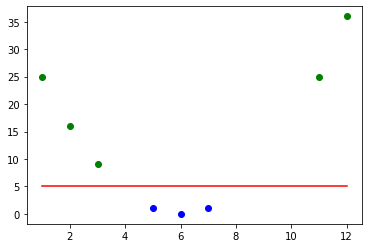

In [127]:
plt.plot(blue,[(i-6)**2 for i in blue], 'bo')
plt.plot(green,[(i-6)**2 for i in green], 'go')
plt.plot(green, [5 for i in green], 'r')

### kermel trick 
저차원에선 선형적인 구분이 불가능하지만, mapping을 통해 더 고차원으로 변환시킨 후 선형적으로 구분할 수 있게 하는 방법

In [192]:
from sklearn.datasets.samples_generator import make_circles
X, y= make_circles(100, factor=0.1, noise=0.1)

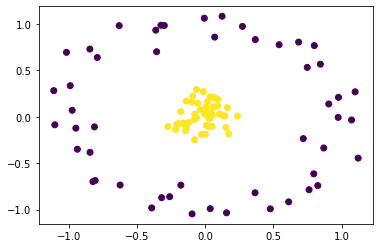

In [193]:
clf=SVC(kernel='linear')
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1], c = y)

In [194]:
clf.predict(X)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

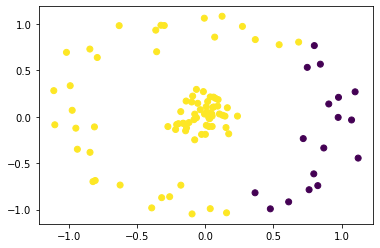

In [195]:
plt.scatter(X[:,0],X[:,1], c= clf.predict(X))

In [196]:
clf.score(X,y)

0.67

#### 선형적으로 분류하였을 때 잘 맞지 않음을 확인할 수 있음

In [198]:
SVC?

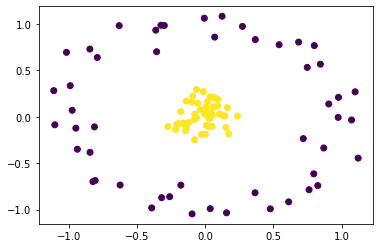

In [200]:
clf2 = SVC(gamma = 'auto')
clf2.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=clf2.predict(X))

#### 기본 kernel은 rbf로 설정되어있음. 분류하는 방법은 여러가지가 존재함. linear, rbf 등등.... rbf를 kernel로 설정하였을 때 잘 분류되어짐을 확인할 수 있음

In [201]:
clf2.score(X,y)

1.0